# Iris Dataset Classification

## 1. Goal
This assignment requires learners to:
- Understand the flow of a classification problem  
- Practice multiple ML models (KNN, Logistic Regression, SVM, Decision Tree, Random Forest)  
- Evaluate models with accuracy, precision, recall, F1  
- Visualize decision boundaries

# 2. Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame
df['species'] = df['target'].map({0: "setosa", 1: "versicolor", 2: "virginica"}) # mapped target to the rightful species name

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
# Extract only versicolor & virginica, with sepal_length and petal_length
binary_df = df[df['species'].isin(['versicolor','virginica'])]
X = binary_df[['sepal length (cm)', 'petal length (cm)']].values
y = binary_df['species'].values

## 3. Data Visualization
Scatter, boxplot, violin for selected features.

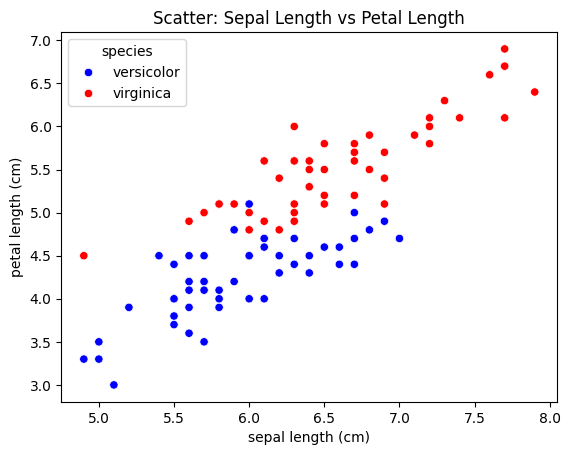

/tmp/ipython-input-1981486529.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=binary_df, x='species', y='sepal length (cm)', palette=['blue','red'])


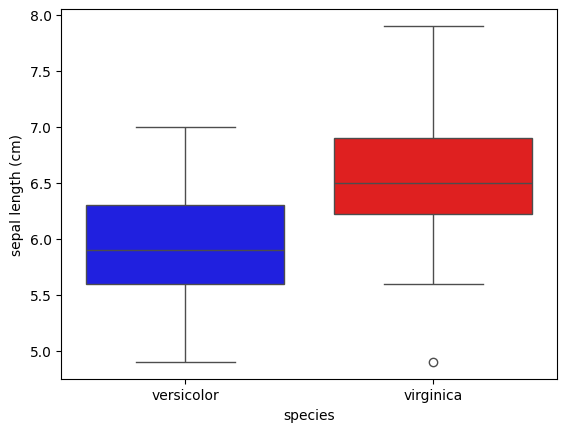

/tmp/ipython-input-1981486529.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=binary_df, x='species', y='petal length (cm)', palette=['blue','red'])


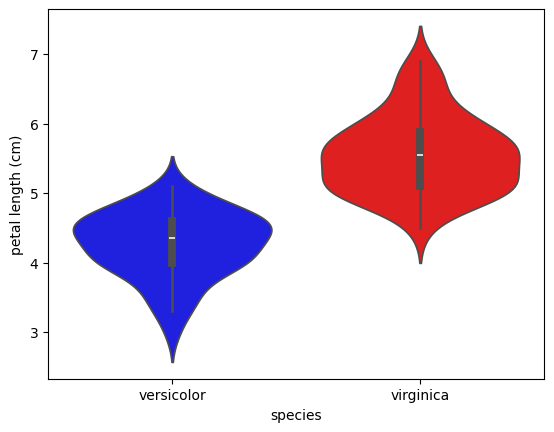

In [4]:
import seaborn as sns

sns.scatterplot(data=binary_df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette=['blue','red'])
plt.title("Scatter: Sepal Length vs Petal Length")
plt.show()

sns.boxplot(data=binary_df, x='species', y='sepal length (cm)', palette=['blue','red'])
plt.show()

sns.violinplot(data=binary_df, x='species', y='petal length (cm)', palette=['blue','red'])
plt.show()

Let's try the three species

In [10]:
# Extract only versicolor & virginica, with sepal_length and petal_length
tri_df = df[df['species'].isin(['versicolor','virginica', 'setosa'])]
X_tri = tri_df[['sepal length (cm)', 'petal length (cm)']].values
y_tri = tri_df['species'].values

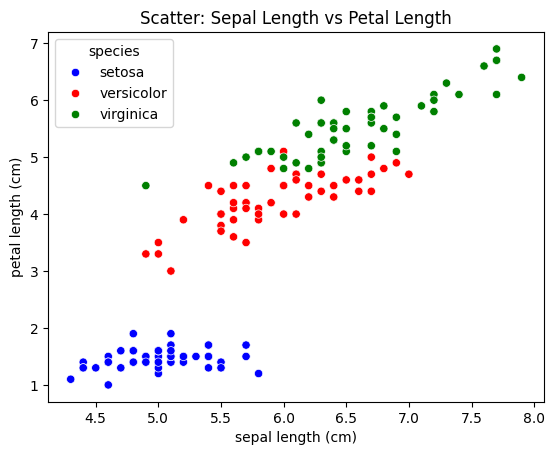

/tmp/ipython-input-3819540847.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tri_df, x='species', y='sepal length (cm)', palette=['blue','red', 'green'])


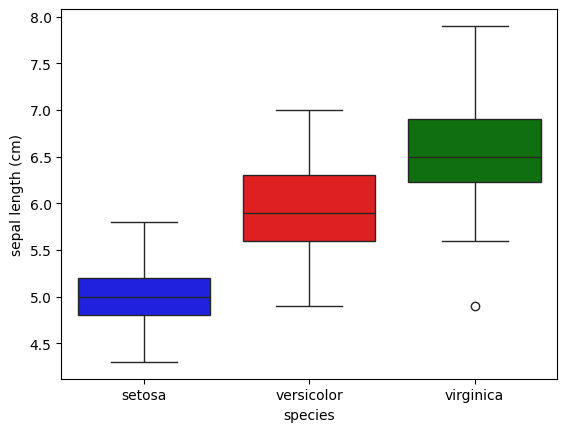

/tmp/ipython-input-3819540847.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=tri_df, x='species', y='petal length (cm)', palette=['blue','red', 'green'])


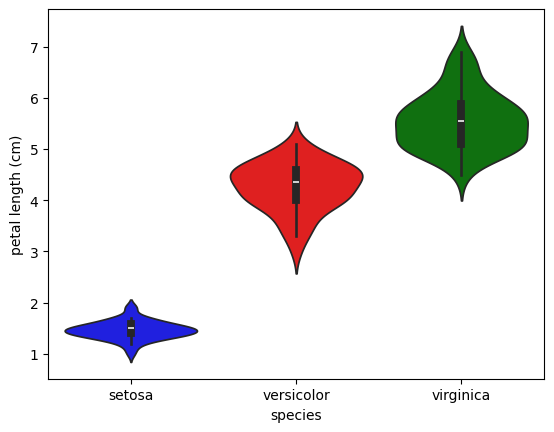

In [11]:
sns.scatterplot(data=tri_df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette=['blue','red', 'green'])
plt.title("Scatter: Sepal Length vs Petal Length")
plt.show()

sns.boxplot(data=tri_df, x='species', y='sepal length (cm)', palette=['blue','red', 'green'])
plt.show()

sns.violinplot(data=tri_df, x='species', y='petal length (cm)', palette=['blue','red', 'green'])
plt.show()

## 4. Data Splitting & Standardization

We start with the first 2 classes

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. Classification Models
Nearest Neighbor, Logistic Regression, SVM, Decision Tree, Random Forest

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel="linear"),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)
    print(f"=== {name} ===")
    print(confusion_matrix(y_test, y_pred, labels=["versicolor","virginica"]))
    print(classification_report(y_test, y_pred, target_names=["versicolor","virginica"]))
    results[name] = (model, y_pred)

=== KNN ===
[[13  0]
 [ 1 11]]
              precision    recall  f1-score   support

  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25

=== Logistic Regression ===
[[13  0]
 [ 1 11]]
              precision    recall  f1-score   support

  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25

=== SVM ===
[[13  0]
 [ 0 12]]
              precision    recall  f1-score   support

  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       

SVM is the best performing model!

## 6. Decision Region Visualization

In [16]:
import numpy as np
from matplotlib.colors import ListedColormap

def decision_region(X_plot, y_labels, model, scaler=None, step=0.02,
                    title='Decision Region', xlabel='Feature 1', ylabel='Feature 2'):
    """
    X_plot : ndarray of shape (n_samples, 2) in ORIGINAL units (for axes & scatter)
    y_labels : array-like of string labels, e.g. ['versicolor','virginica',...]
    model : a fitted classifier (possibly trained on standardized features)
    scaler : fitted scaler used for training (e.g., StandardScaler). If provided,
             the prediction mesh will be transformed with it.
    """

    # --- map labels (strings) -> ints for plotting ---
    classes = np.unique(y_labels)
    class_to_int = {c:i for i,c in enumerate(classes)}
    y_int = np.vectorize(class_to_int.get)(y_labels)

    # --- build mesh in original feature space for nice axes ---
    x_min, x_max = X_plot[:,0].min() - 0.5, X_plot[:,0].max() + 0.5
    y_min, y_max = X_plot[:,1].min() - 0.5, X_plot[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    mesh_orig = np.c_[xx.ravel(), yy.ravel()].astype(float)

    # --- transform mesh if model expects standardized inputs ---
    mesh_for_pred = scaler.transform(mesh_orig) if scaler is not None else mesh_orig

    # --- predict on mesh; convert string preds -> ints for contourf ---
    y_mesh_labels = model.predict(mesh_for_pred)
    y_mesh_int = np.vectorize(class_to_int.get)(y_mesh_labels).reshape(xx.shape)

    # --- colors (feel free to tweak) ---
    scatter_colors = ['red', 'blue', 'green'][:len(classes)]
    contour_colors = ['mistyrose', 'lightblue', 'honeydew'][:len(classes)]

    # --- plot decision regions ---
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(xx, yy, y_mesh_int, alpha=0.6, cmap=ListedColormap(contour_colors))

    # --- plot points (original units) ---
    for i, c in enumerate(classes):
        pts = X_plot[y_int == i]
        plt.scatter(pts[:,0], pts[:,1], s=60, edgecolor='k',
                    color=scatter_colors[i], label=c, alpha=0.9)

    plt.legend(title="Species")
    plt.show()

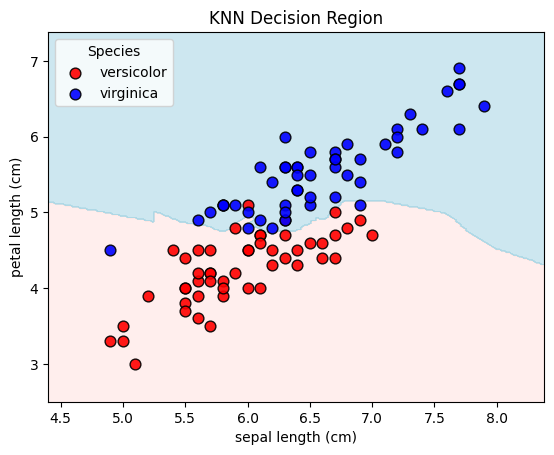

In [17]:
# Call the function
decision_region(
    X_plot=X,
    y_labels=y,
    model=models["KNN"],      # any trained model from your dictionary
    scaler=scaler,            # the SAME scaler used to standardize training data
    step=0.02,
    title="KNN Decision Region",
    xlabel="sepal length (cm)",
    ylabel="petal length (cm)"
)

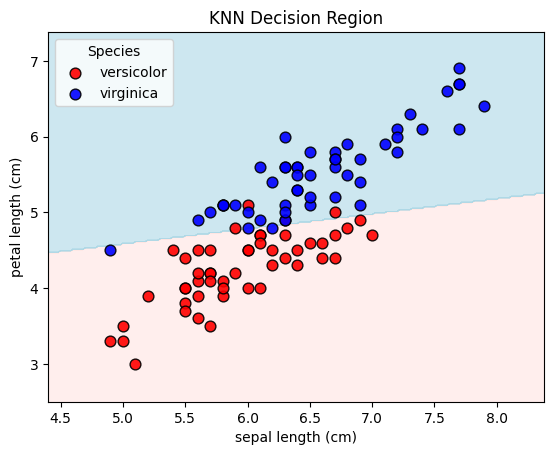

In [18]:
# Call the function
decision_region(
    X_plot=X,
    y_labels=y,
    model=models["SVM"],      # any trained model from your dictionary
    scaler=scaler,            # the SAME scaler used to standardize training data
    step=0.02,
    title="KNN Decision Region",
    xlabel="sepal length (cm)",
    ylabel="petal length (cm)"
)

## 7. Multi-class Classification
We now expand to all three species with all four features.

In [20]:
X_all = df[iris.feature_names].values
y_all = df['species'].values

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.25, stratify=y_all, random_state=0)

scaler_all = StandardScaler()
X_train_all_std = scaler_all.fit_transform(X_train_all)
X_test_all_std = scaler_all.transform(X_test_all)

clf = RandomForestClassifier() # used RF; can try other models
clf.fit(X_train_all_std, y_train_all)
y_pred_all = clf.predict(X_test_all_std)

print(confusion_matrix(y_test_all, y_pred_all, labels=["setosa","versicolor","virginica"]))
print(classification_report(y_test_all, y_pred_all, target_names=["setosa","versicolor","virginica"]))

[[13  0  0]
 [ 0 13  0]
 [ 0  2 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.87      1.00      0.93        13
   virginica       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38

